<a href="https://colab.research.google.com/github/victoriareddy/deep-learning-projects/blob/main/Copy_of_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLDS/DiRP Deep Learning Series Project 1: Convolutional Neural Networks

For this project, you will writing a convolutional neural network using PyTorch.

### Getting Started: Google Colab

On Google Colab, click connect and start running cells. All the necessary packages are pre-installed.

### Getting Started: Local

To run this project locally with conda, run the following commands:

``` bash
conda create -n dl_series python==3.10.13
conda activate dl_series
pip install torch
pip install scikit-learn
pip install juptyerlab
pip install tqdm
```

If you do not have conda, you can install the VSCode Extension `Python Environment Manager`, then it should prompt you to install conda.

### Project Tasks

1. Implement the CNN class
2. Define the dataloaders, criterion, optimizer, and model
3. Write the training loop
4. Experiment with different hyperparameters

### Bonus Tasks

1. Instead of classifying the images, try generating them. Pass the digit label into you model and output the image. Use mean sqaured error loss between the generated image and the target image.

## Useful Functions

``` python3
nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
nn.BatchNorm2d(num_features)
nn.Dropout(p)
nn.ReLU()

nn.MaxPool2d(kernel_size, stride)
nn.Flatten()
nn.Linear(in_features, out_features)
nn.BatchNorm1d(num_features)
nn.Softmax(dim)

random_split(dataset, lengths)
DataLoader(dataset, batch_size, shuffle)
nn.NLLLoss()
torch.optim(params, lr)
```

In [ ]:
import torch
from torch import Tensor, nn
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from tqdm import tqdm

In [ ]:
# Convolutional Neural Network
class CNN(nn.Module):
    def __init__(self):
        """Define layers here"""
        super().__init__()

        self.mods = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.Dropout(0.1),
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),

            nn.Linear(32 * 7 * 7, 512),
            nn.BatchNorm1d(512),
            nn.Dropout(0.1),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.Softmax(dim=1),
        )

    def forward(self, x: Tensor) -> Tensor:
        """Use layers here
        Input dimension: (batch_size, 1, 28, 28)
        Output dimension: (batch_size, 10)"""

        x = self.mods(x)
        return x

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 35.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.26MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.75MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.94MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Input shape: torch.Size([1, 28, 28])
Input min: tensor(0.)
Input max: tensor(1.)
Input:


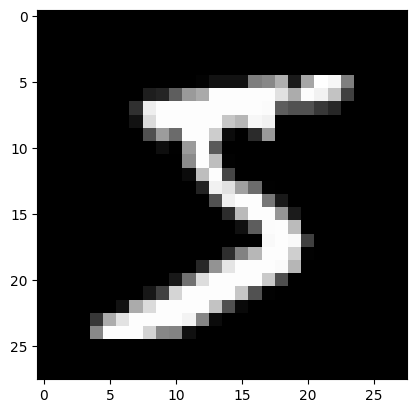

Target: 5


In [ ]:
# Download and load the dataset
# Add a transform to convert each PIL image to a PyTorch tensor
dataset = torchvision.datasets.MNIST(
    root="./data", download=True, transform=transforms.ToTensor()
)

print("Input shape:", dataset[0][0].shape)
print("Input min:", dataset[0][0].min())
print("Input max:", dataset[0][0].max())
print("Input:")
plt.imshow(dataset[0][0].squeeze(), cmap="gray")
plt.show()

print("Target:", dataset[0][1])

In [ ]:
# Create dataloaders

train_dataset, val_dataset, test_dataset = random_split(
    dataset, [0.8, 0.1, 0.1], generator=torch.Generator().manual_seed(42)
)
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=False)


# Create the CNN model

model = CNN()
# Define the loss function and optimizer

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=2e-1)

In [ ]:
# Train the model
for epoch in range(10):
    model.train()
    train_loss = 0.0
    train_acc = 0.0
    for inputs, targets in tqdm(
        train_dataloader, desc=f"Epoch {epoch}", colour="green"
    ):
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (outputs.argmax(dim=1) == targets).float().mean().item()

        model.eval()
    with torch.no_grad():
        val_loss = 0.0
        val_acc = 0.0
        for inputs, targets in val_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            val_acc += (outputs.argmax(dim=1) == targets).float().mean().item()

            test_loss = 0.0
        test_acc = 0.0
        for inputs, targets in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            test_acc += (outputs.argmax(dim=1) == targets).float().mean().item()

    train_loss /= len(train_dataloader)
    val_loss /= len(val_dataloader)
    test_loss /= len(test_dataloader)
    train_acc /= len(train_dataloader)
    val_acc /= len(val_dataloader)
    test_acc /= len(test_dataloader)

    print(
        f"\tTrain Loss: {train_loss:4f}, Val Loss: {val_loss:4f}, Test Loss: {test_loss:4f}"
    )
    print(
        f"\tTrain Acc: {train_acc:4f}, Val Acc: {val_acc:4f}, Test Acc: {test_acc:4f}"
    )



Epoch 0: 100%|██████████| 188/188 [00:51<00:00,  3.64it/s]


	Train Loss: -0.460191, Val Loss: -0.848927, Test Loss: -0.844755
	Train Acc: 0.546002, Val Acc: 0.873675, Test Acc: 0.870373


Epoch 1: 100%|██████████| 188/188 [00:50<00:00,  3.70it/s]


	Train Loss: -0.901983, Val Loss: -0.930241, Test Loss: -0.932978
	Train Acc: 0.915455, Val Acc: 0.939128, Test Acc: 0.940592


Epoch 2: 100%|██████████| 188/188 [00:50<00:00,  3.73it/s]


	Train Loss: -0.942492, Val Loss: -0.941028, Test Loss: -0.940447
	Train Acc: 0.950154, Val Acc: 0.948172, Test Acc: 0.945917


Epoch 3: 100%|██████████| 188/188 [00:51<00:00,  3.68it/s]


	Train Loss: -0.956242, Val Loss: -0.956337, Test Loss: -0.955658
	Train Acc: 0.962953, Val Acc: 0.962751, Test Acc: 0.958915


Epoch 4: 100%|██████████| 188/188 [00:50<00:00,  3.73it/s]


	Train Loss: -0.963632, Val Loss: -0.965058, Test Loss: -0.965829
	Train Acc: 0.969228, Val Acc: 0.968797, Test Acc: 0.971052


Epoch 5: 100%|██████████| 188/188 [00:50<00:00,  3.73it/s]


	Train Loss: -0.967554, Val Loss: -0.963882, Test Loss: -0.964596
	Train Acc: 0.972781, Val Acc: 0.967913, Test Acc: 0.968610


Epoch 6: 100%|██████████| 188/188 [00:50<00:00,  3.75it/s]


	Train Loss: -0.971067, Val Loss: -0.963456, Test Loss: -0.962935
	Train Acc: 0.975877, Val Acc: 0.968029, Test Acc: 0.967634


Epoch 7: 100%|██████████| 188/188 [00:50<00:00,  3.72it/s]


	Train Loss: -0.973809, Val Loss: -0.969232, Test Loss: -0.969870
	Train Acc: 0.978453, Val Acc: 0.974028, Test Acc: 0.974423


Epoch 8: 100%|██████████| 188/188 [00:51<00:00,  3.66it/s]


	Train Loss: -0.975444, Val Loss: -0.974170, Test Loss: -0.975532
	Train Acc: 0.979742, Val Acc: 0.978051, Test Acc: 0.979446


Epoch 9: 100%|██████████| 188/188 [00:50<00:00,  3.75it/s]


	Train Loss: -0.977388, Val Loss: -0.972406, Test Loss: -0.971960
	Train Acc: 0.981902, Val Acc: 0.975772, Test Acc: 0.976144
